In [2]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
#import plotly
plt.style.use(['science','no-latex'])
#plt.style.available

In [46]:
genie_syst_tree = uproot.open('/sbnd/app/users/brindenc/mysbn/srcs/sbnana/sbnana/CAFAna/test/test_ensemble_genie_systs.root:systs;1')
genie_syst = genie_syst_tree.arrays(library='pd')

flux_syst_tree = uproot.open('/sbnd/app/users/brindenc/mysbn/srcs/sbnana/sbnana/CAFAna/test/test_ensemble_flux_systs.root:systs;1')
flux_syst = flux_syst_tree.arrays(library='pd')

In [52]:
genie_syst.loc[:,'yerr_minus'] = (genie_syst.loc[:,'ynom']-genie_syst.loc[:,'y0'])/genie_syst.loc[:,'ynom']
genie_syst.loc[:,'yerr_plus'] = abs((genie_syst.loc[:,'ynom']-genie_syst.loc[:,'y1'])/genie_syst.loc[:,'ynom'])

flux_syst.loc[:,'yerr_minus'] = (flux_syst.loc[:,'ynom']-flux_syst.loc[:,'y0'])/flux_syst.loc[:,'ynom']
flux_syst.loc[:,'yerr_plus'] = abs((flux_syst.loc[:,'ynom']-flux_syst.loc[:,'y1'])/flux_syst.loc[:,'ynom'])

genie_syst = genie_syst.fillna(0)
flux_syst = flux_syst.fillna(0)

In [53]:
genie_syst.head()
flux_syst.head()

xnom       ynom         y0         y1   dx  yerr_minus  \
entry subentry                                                           
0     0        -0.05   0.000000   0.000000   0.000000  0.1    0.000000   
      1         0.05   0.000000   0.000000   0.000000  0.1    0.000000   
      2         0.15   0.000000   0.000000   0.000000  0.1    0.000000   
      3         0.25  12.485865  12.900965  17.928246  0.1   -0.033246   
      4         0.35  74.915192  70.323463  78.494553  0.1    0.061292   

                yerr_plus  
entry subentry             
0     0          0.000000  
      1          0.000000  
      2          0.000000  
      3          0.435883  
      4          0.047779

<AxesSubplot:xlabel='xnom'>

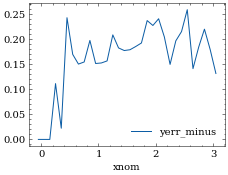

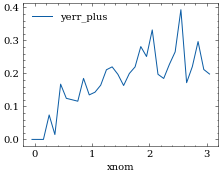

In [54]:
genie_syst.plot('xnom','yerr_minus')
genie_syst.plot('xnom','yerr_plus')

$x=1$

Text(0.5, 1.0, 'Fractional Systematic Uncertainties')

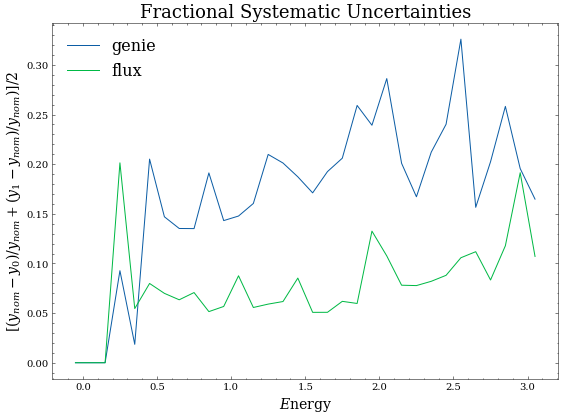

In [78]:
x = genie_syst.loc[:,'xnom'].values

y_label = 'yerr_minus'
y = genie_syst.loc[:,y_label].values
y2 = flux_syst.loc[:,y_label].values

y1_label = 'yerr_plus'
y1 = genie_syst.loc[:,y1_label].values
y3 = flux_syst.loc[:,y1_label].values
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
#plt.rcParams['text.usetex'] = True

ax.plot(x,(y+y1)/2,label='genie')
#plt.plot(x,y1,label=y1_label+' genie')
#plt.plot(x,y2,label=y_label+' flux')
#ax.bar(x,(y2+y3)/2,label='flux',linewidth=3,alpha=1,edgecolor='blue')
ax.plot(x,(y2+y3)/2,label='flux')
ax.legend(fontsize=16)
ax.set_xlabel('$E$nergy',fontsize=14)
ax.set_ylabel('$[(y_{nom}-y_0)/y_{nom}+(y_1-y_{nom})/y_{nom})]/2$',fontsize=14)
ax.set_title('Fractional Systematic Uncertainties',fontsize=18)

In [61]:
x

array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
        0.85,  0.95,  1.05,  1.15,  1.25,  1.35,  1.45,  1.55,  1.65,
        1.75,  1.85,  1.95,  2.05,  2.15,  2.25,  2.35,  2.45,  2.55,
        2.65,  2.75,  2.85,  2.95,  3.05], dtype=float32)

In [56]:
np.mean((y+y1)/2),np.mean((y2+y3)/2)

(0.17037377, 0.078216456)